# Check sync process

In [1]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()

Local configuration file found !!, no need to run the configuration (unless configuration has changed)


In [2]:
import datetime
import pathlib
import numpy as np
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


#from u19_pipeline import acquisition, ephys
# from u19_pipeline.ephys import ephys_element, probe_element, get_session_directory
# import u19_pipeline.ephys_sync as ephys
import u19_pipeline.acquisition as acquisition
import datajoint as dj

import u19_pipeline.utils.DemoReadSGLXData.readSGLX as readSGLX
import u19_pipeline.utils.ephys_utils as ephys_utils
from bitstring import BitArray

Connecting alvaros@datajoint00.pni.princeton.edu:3306


In [5]:
key = {'subject_fullname': 'testuser_T01',
    'session_date': datetime.date(2022, 5, 12)}

#key = {
#    'subject_fullname': 'jjulian_jj042',
#    'session_date': datetime.date(2021, 11, 1)}

#key = {
#    'subject_fullname': 'jjulian_jj042',
#    'session_date': datetime.date(2021, 10, 31)}


key = (acquisition.Session & key).fetch1('KEY')
key

{'subject_fullname': 'testuser_T01',
 'session_date': datetime.date(2022, 5, 12),
 'session_number': 0}

# Synchronize ePhys and Behavior

Populate the tables, using the nidaq file produced by spikeGLX. This is done automatically and produces a record of VR iteration numbers measured in the time of the ePhys setup.

In [7]:
ephys = dj.create_virtual_module('ephys', 'u19_ephys')

ephys.BehaviorSync()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,nidq_sampling_rate sampling rate of behavioral iterations niSampRate in nidq meta file,iteration_index_nidq length of this longblob should be the number of iterations in the behavior recording,trial_index_nidq length of this longblob should be the number of iterations in the behavior recording
hnieh_E105,2021-01-15,0,5000.08,=BLOB=,=BLOB=
jjulian_jj042,2021-10-31,0,5000.06,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-14,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-15,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-16,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-17,0,5000.06,=BLOB=,=BLOB=
jjulian_jj049,2022-01-14,0,5000.06,=BLOB=,=BLOB=
jjulian_jj049,2022-01-15,0,5000.06,=BLOB=,=BLOB=
jjulian_jj049,2022-01-16,0,5000.06,=BLOB=,=BLOB=


In [8]:
ephys.EphysSession()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,ephys_directory Path were session file will be stored in bucket
hnieh_E105,2021-01-15,0,/Volumes/Tank/schottdorf/NPX/2021_01_15_E105/towersTask_g0
jjulian_jj042,2021-10-31,0,/RigData/training/npx/electrophysiology/josh/jjulian_jj042/20211031/jjulian_jj042_20211031_g0
jjulian_jj042,2021-11-01,0,/RigData/training/npx/electrophysiology/josh/jjulian_jj042/20211101/jjulian_jj042_20211101_g0
jjulian_jj048,2022-01-14,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj048/01142022/jjulian_jj048_01142022_g0
jjulian_jj048,2022-01-15,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj048/01152022/jjulian_jj048_01152022_g0
jjulian_jj048,2022-01-16,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj048/01162022/jjulian_jj048_01162022_g0
jjulian_jj048,2022-01-17,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj048/01172022/jjulian_jj048_01172022_g0
jjulian_jj049,2022-01-14,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj049/01142022/jjulian_jj049_01142022_g0
jjulian_jj049,2022-01-15,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj049/01152022/jjulian_jj049_01152022_g0
jjulian_jj049,2022-01-16,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj049/01162022/jjulian_jj049_01162022_g0


### Read nidaq file and behavior data

In [10]:
session_dir = pathlib.Path(get_session_directory(key))

#session_dir = pathlib.Path('/Users/alvaros/Documents/MATLAB/BrainCogsProjects/CalciumImagingData/test_g0/')
nidq_bin_full_path = list(session_dir.glob('*nidq.bin*'))[0]

#Nidaq file
nidq_meta          = readSGLX.readMeta(nidq_bin_full_path)
nidq_sampling_rate = readSGLX.SampRate(nidq_meta)
digital_array      = ephys_utils.spice_glx_utility.load_spice_glx_digital_file(nidq_bin_full_path, nidq_meta)

#Behavior data
behavior = dj.create_virtual_module('behavior', 'u19_behavior')
thissession = behavior.TowersBlock().Trial() & key
behavior_time, iterstart, beh_num_iterations = thissession.fetch('trial_time', 'vi_start', 'iterations')


nChan: 9, nFileSamp: 3424640


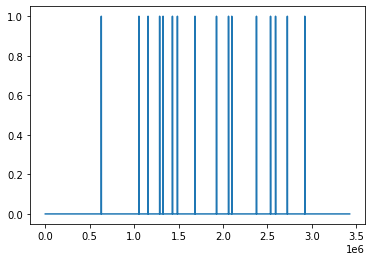

In [11]:
plt.plot(digital_array[1,:])

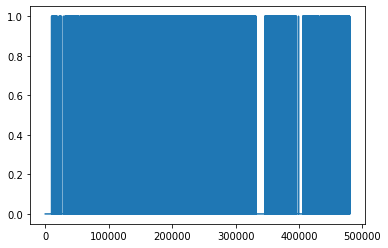

In [12]:
plt.plot(digital_array[0,620000:1100000])

In [ ]:
digital_array

In [8]:
thissession

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,block block number,"trial_idx trial index, keep the original number in the file","trial_type answer of this trial, left or right","choice choice of this trial, left or right",trial_abs_start absolute start time of the trial realtive to the beginning of the session,cue_presence_left boolean vector for the presence of the towers on the left,cue_presence_right boolean vector for the presence of the towers on the right,cue_onset_left onset time of the cues on the left (only for the present ones),cue_onset_right onset time of the cues on the right (only for the present ones),cue_offset_left offset time of the cues on the left (only for the present ones),cue_offset_right offset time of the cues on the right (only for the present ones),cue_pos_left position of the cues on the left (only for the present ones),cue_pos_right position of the cues on the right (only for the present ones),trial_duration duration of the entire trial,excess_travel metric that indicates if mice travelled on a straight line,i_arm_entry the index of the time series when the mouse enters the arm part,i_blank the index of the time series when the mouse enters the blank zone,i_cue_entry the index of the time series when the mouse neters the cue zone,i_mem_entry the index of the time series when the mouse enters the memory zone,i_turn_entry the index of the time series when the mouse enters turns,iterations length of the meaningful recording,trial_id,trial_prior_p_left prior probablity of this trial for left,vi_start,"trial_time time series of this trial, start from zero for each trial",collision boolean vector indicating whether the subject hit the maze on each time point,"position 3d recording of the position of the mouse, length equals to interations","velocity 3d recording of the velocity of the mouse, length equals to interations",sensor_dots raw recordings of the ball
jjulian_jj042,2021-11-01,0,1,1,L,L,0.591682,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,24.8195,0.221423,1264,0,960,985,1264,1555,1,0.5,2,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,1,2,R,R,25.4111,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,14.9232,-0.102731,706,0,401,435,706,834,2,0.5,1786,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,1,3,L,L,40.3344,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,12.074,-0.129398,485,0,211,234,485,622,5,0.5,2848,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,1,4,L,L,52.4084,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,11.2428,-0.156816,513,0,243,268,513,559,-8,0.5,3698,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,1,5,R,R,63.6512,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,15.3984,-0.0761885,770,0,303,342,770,870,-3,0.5,4485,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,1,6,L,L,79.0496,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,11.2202,-0.147534,479,0,167,196,479,557,5,0.5,5583,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,1,7,R,R,90.2698,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,12.942,-0.121921,511,0,227,274,511,688,3,0.5,6369,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,1,8,L,L,103.212,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,15.1002,-0.101564,501,0,231,264,501,849,4,0.5,7285,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,1,9,R,R,118.312,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,20.3529,-0.0781874,1065,0,770,808,1065,1244,5,0.5,8362,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,1,10,R,R,138.665,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,11.474,-0.15115,529,0,234,285,529,576,6,0.5,9834,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [9]:
digital_array.shape

(8, 18295516)

### Get samples and times where trials and iterations start

In [14]:
mode = 'counter_bit0'    #Default for sessions before 12/01/2021
#mode = 'pulses'    #Default for sessions after 12/01/2021
iteration_dict = ephys_utils.get_iteration_sample_vector_from_digital_lines_pulses(digital_array[1,:], digital_array[0,:], nidq_sampling_rate, behavior_time.shape[0], mode=mode)
#                             get_iteration_sample_vector_from_digital_lines_pulses(trial_pulse_signal, iteration_pulse_signal,

status = ephys_utils.assert_iteration_samples_count(iteration_dict['iter_start_idx'], behavior_time)
status


1
1623
1623
2
940
940
3
799
799
4
792
792
5
980
980
6
686
686
7
1141
1141
8
628
628
9
763
763
10
793
793


True

### Plot signals around start of a trial

time from niDAQ 11.07704
time behavior [11.074952]
samples nidaq 276926
iter nidaq (1141,)
iter_virmen (1141, 1)


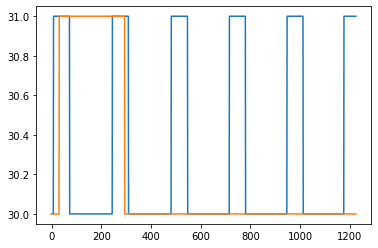

In [15]:
trial_plot = 6
samp_before = 30
end_iter = 5
samp_after = 30

plt.plot(digital_array[0,iteration_dict['iter_start_idx'][trial_plot][0]-samp_before:iteration_dict['iter_start_idx'][trial_plot][end_iter]]+samp_after)
plt.plot(digital_array[1,iteration_dict['iter_start_idx'][trial_plot][0]-samp_before:iteration_dict['iter_start_idx'][trial_plot][end_iter]]+samp_after)


iter_nidaq = (iteration_dict['iter_start_idx'][trial_plot][-1]-iteration_dict['iter_start_idx'][trial_plot][0])
time = iter_nidaq/nidq_sampling_rate
iter_virmen = time*120

print('time from niDAQ', time)
print('time behavior', behavior_time[trial_plot][-1])

print('samples nidaq', iter_nidaq)
print('iter nidaq', iteration_dict['iter_start_idx'][trial_plot].shape)
print('iter_virmen',behavior_time[trial_plot].shape)

### Plot average time differences between behavior file and nidaq time

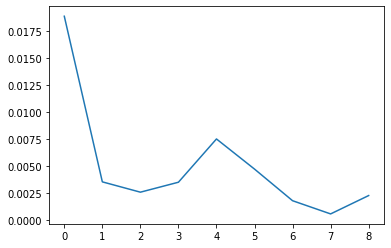

In [16]:
x = np.array([])
mean_x = np.array([])
for i in range(iteration_dict['iter_times_idx'].shape[0]-1):
    s = behavior_time[i].flatten()-iteration_dict['iter_times_idx'][i]
    mean_time_trial = np.mean(s)
    x = np.append(x,s, axis=0)
    mean_x = np.append(mean_x, mean_time_trial)

#plt.plot(x)
plt.plot(mean_x)


### Test BehaviorSync insertion

In [14]:
ephys.BehaviorSync.populate(key)

nChan: 1, nFileSamp: 18295516
{'subject_fullname': 'jjulian_jj042', 'session_date': datetime.date(2021, 11, 1), 'session_number': 0, 'nidq_sampling_rate': 5000.062709, 'iteration_index_nidq': array([nan, nan, nan, ..., nan, nan, nan]), 'trial_index_nidq': array([nan, nan, nan, ..., nan, nan, nan])}


In [15]:
ephys.BehaviorSync()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,nidq_sampling_rate sampling rate of behavioral iterations niSampRate in nidq meta file,iteration_index_nidq length of this longblob should be the number of iterations in the behavior recording,trial_index_nidq length of this longblob should be the number of iterations in the behavior recording
hnieh_E105,2021-01-15,0,5000.08,=BLOB=,=BLOB=
jjulian_jj042,2021-10-31,0,5000.06,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,5000.06,=BLOB=,=BLOB=
ms81_M004,2021-05-07,0,5000.06,=BLOB=,=BLOB=
ms81_M005,2021-05-05,0,5000.07,=BLOB=,=BLOB=
testuser_test70,2021-10-12,0,5000.06,=BLOB=,=BLOB=
